In [58]:
import numpy as np
import matplotlib.pyplot as plt
import os
currentDirectory = os.getcwd()
os.chdir(os.path.dirname(currentDirectory))
from TDOA_estimation import GenerateFIR_Filter, GCC_PHAT, CrossCorr
import time
from scipy.signal import filtfilt, ellip, freqz, lfilter, fftconvolve
import matplotlib.pyplot as plt

from unit_test_utils import GenerateSinPulses

## Generate and visualize test signals

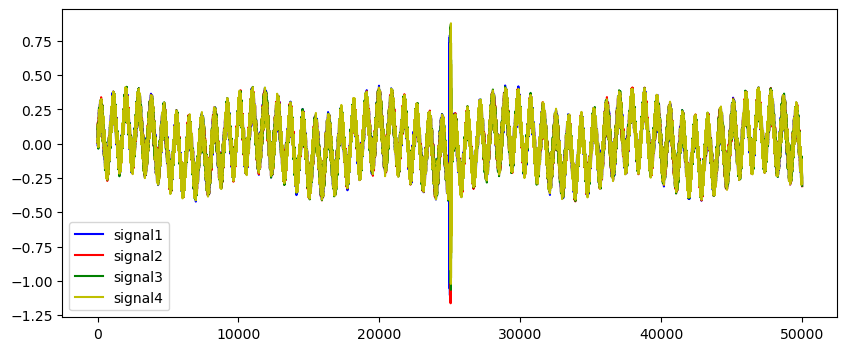

In [65]:
sampleRate = 100000
duration = 0.5
offsets = [54,70,76]
pulseFrequency = 20000
numPulseCycles = 4
otherFreqs = [70,700,8000]
otherAmps = [.1,0.2,.1]
noiseScale = .01

signal1, signal2, signal3, signal4, trueTDOAs = GenerateSinPulses(sampleRate, duration, offsets, 
                                                                   pulseFrequency, numPulseCycles, 
                                                                   otherFreqs, otherAmps, noiseScale)


zoom = False # Set this value to true to zoom in on the pulses
plt.figure(figsize=(10,4))

startPoint = 0
endPoint = len(signal1)
if zoom:
    startPoint = 24500
    endPoint = 25500
    
plt.plot(signal1[startPoint:endPoint],c= 'b', label = "signal1")
plt.plot(signal2[startPoint:endPoint], c= 'r', label = "signal2")
plt.plot(signal3[startPoint:endPoint],c= 'g', label = "signal3")
plt.plot(signal4[startPoint:endPoint], c= 'y', label = "signal4")
plt.legend()
plt.show()

## Produce and Visualize FIR filter

[ 8.53047054e-18 -1.20408459e-03 -2.79048832e-03 -4.23666924e-03
 -3.95148698e-03 -9.67241718e-18  8.27504584e-03  1.86243264e-02
  2.54459967e-02  2.12822929e-02  2.40250362e-17 -3.96757033e-02
 -9.20921859e-02 -1.45420120e-01 -1.85311986e-01  8.00409707e-01
 -1.85311986e-01 -1.45420120e-01 -9.20921859e-02 -3.96757033e-02
  2.40250362e-17  2.12822929e-02  2.54459967e-02  1.86243264e-02
  8.27504584e-03 -9.67241718e-18 -3.95148698e-03 -4.23666924e-03
 -2.79048832e-03 -1.20408459e-03  8.53047054e-18]


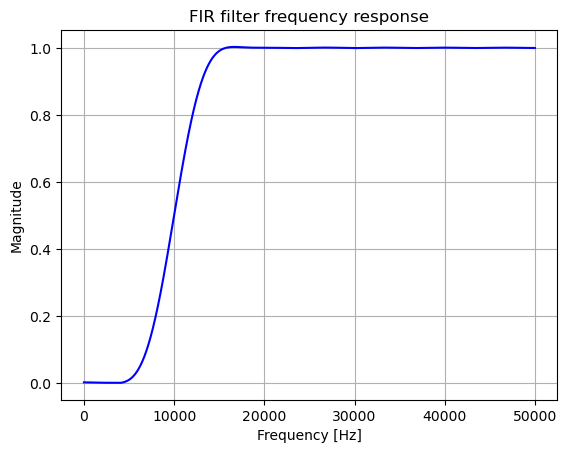

In [66]:
cutoffFrequency = 10000  # Cutoff frequency for highpass filter
numTaps = 31  # Number of taps for the FIR filter
taps = GenerateFIR_Filter(cutoffFrequency, numTaps, sampleRate)

print(taps)


# Frequency response
w, h = freqz(taps, 1, worN=8000)
plt.figure()
plt.plot(0.5*sampleRate*w/np.pi, np.abs(h), 'b')
plt.title("FIR filter frequency response")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

## Estimate TDOAs using non-filtered and filtered signals 

In [67]:
#######################
## non-filtered signals
#######################

dataMatrix = np.vstack(np.array([signal1, signal2, 
                                 signal3, signal4]))

print(" ------ TDOA using cross-correlation with non-filtered signals: ")
startTime = time.time()
tdoaEstimates = CrossCorr(dataMatrix, sampleRate)
print("Runtime: ", time.time() - startTime)
print("TDOA predictions: ")
print(tdoaEstimates)
print("TDOA Error: ")
error = np.sqrt(np.sum((tdoaEstimates - trueTDOAs)**2))
print("{:e}".format(error))

print(" ------ TDOA using GCC_PHAT with non-filtered signals: ")
startTime = time.time()
tdoaEstimates = GCC_PHAT(dataMatrix, sampleRate, 4, max_tau=None, interp=16)
print(tdoaEstimates)
print("Runtime: ", time.time() - startTime)
print("TDOA predictions: ")
print(tdoaEstimates)
print("TDOA Error: ")
error = np.sqrt(np.sum((tdoaEstimates - trueTDOAs)**2))
print("{:e}".format(error))
dataMatrix = 0 # clear memory

#######################
## filtered signals
#######################

signal1_filtered = lfilter(taps, 1.0, signal1)
signal2_filtered = lfilter(taps, 1.0, signal2)
signal3_filtered = lfilter(taps, 1.0, signal3)
signal4_filtered = lfilter(taps, 1.0, signal4)


plt.plot(signal1_filtered, c= 'b', label = "filtered signal1")
plt.plot(signal2_filtered, c= 'r', label = "filtered signal2")
plt.plot(signal3_filtered, c= 'g', label = "filtered signal3")
plt.plot(signal4_filtered, c= 'y', label = "filtered signal4")
plt.legend()
plt.show()

dataMatrixFiltered = np.vstack(np.array([signal1_filtered, signal2_filtered, 
                                 signal3_filtered, signal4_filtered]))

print(" ------ TDOA using cross-correlation with non-filtered signals: ")
startTime = time.time()
tdoaEstimates = CrossCorr(dataMatrixFiltered, sampleRate)
print("Runtime: ", time.time() - startTime)
print("TDOA predictions: ")
print(tdoaEstimates)
print("TDOA Error: ")
error = np.sqrt(np.sum((tdoaEstimates - trueTDOAs)**2))
print("{:e}".format(error))


print(" ------ TDOA using GCC_PHAT with non-filtered signals: ")
startTime = time.time()
tdoaEstimates = GCC_PHAT(dataMatrixFiltered, sampleRate, 4, max_tau=None, interp=16)
print(tdoaEstimates)
print("Runtime: ", time.time() - startTime)
print("TDOA predictions: ")
print(tdoaEstimates)
print("TDOA Error: ")
error = np.sqrt(np.sum((tdoaEstimates - trueTDOAs)**2))
print("{:e}".format(error))
dataMatrixFiltered = 0 # clear memory

 ------ TDOA using cross-correlation with non-filtered signals: 
Runtime:  5.112553119659424
TDOA predictions: 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
TDOA Error: 
1.198666e-03
 ------ TDOA using GCC_PHAT with non-filtered signals: 
[-4.74375e-04  7.50000e-06 -7.50000e-04  0.00000e+00  0.00000e+00
  0.00000e+00]
Runtime:  0.05825662612915039
TDOA predictions: 
[-4.74375e-04  7.50000e-06 -7.50000e-04  0.00000e+00  0.00000e+00
  0.00000e+00]
TDOA Error: 


ValueError: operands could not be broadcast together with shapes (6,) (4,4) 

## Calculate average runtime of applying FIR filter in the forward direction

In [62]:
print("Run time test: ")
filterStartTime = time.time()
N = 10000
for i in range(N):
    result = lfilter(taps, 1.0, signal1)
runTime = time.time() - filterStartTime
print("{:e}".format(runTime / N))
print(result[:20])





N = len(signal1)
taps_padded = np.pad(taps, (0, N), 'constant')
signal1_padded = np.pad(signal1, (0, len(taps)), 'constant')
print("Run time test: ")
filterStartTime = time.time()
N = 10000
for i in range(N):
    result = fftconvolve(taps_padded,signal1_padded)
runTime = time.time() - filterStartTime
print("{:e}".format(runTime / N))
print(result[:20])



Run time test: 
2.308786e-05
[-5.86256391e-20  8.27506858e-06  1.54130514e-06 -5.08693594e-05
 -1.61473526e-04 -3.31460135e-04 -5.05941578e-04 -5.46305144e-04
 -2.94164488e-04  3.13825952e-04  1.20771722e-03  2.03570969e-03
  2.26269799e-03  1.24670503e-03 -1.56813868e-03 -1.33549417e-02
  1.16046736e-03  1.01818557e-02 -2.57876416e-03  5.40472715e-04]
Run time test: 
4.091835e-05
[ 3.12507222e-17  8.27506858e-06  1.54130514e-06 -5.08693594e-05
 -1.61473526e-04 -3.31460135e-04 -5.05941578e-04 -5.46305144e-04
 -2.94164488e-04  3.13825952e-04  1.20771722e-03  2.03570969e-03
  2.26269799e-03  1.24670503e-03 -1.56813868e-03 -1.33549417e-02
  1.16046736e-03  1.01818557e-02 -2.57876416e-03  5.40472715e-04]


In [63]:
result = lfilter(taps, 1.0, signal1)
print(result[:20])
print(len(result))

[-5.86256391e-20  8.27506858e-06  1.54130514e-06 -5.08693594e-05
 -1.61473526e-04 -3.31460135e-04 -5.05941578e-04 -5.46305144e-04
 -2.94164488e-04  3.13825952e-04  1.20771722e-03  2.03570969e-03
  2.26269799e-03  1.24670503e-03 -1.56813868e-03 -1.33549417e-02
  1.16046736e-03  1.01818557e-02 -2.57876416e-03  5.40472715e-04]
1000


In [64]:
import numpy as np
from scipy.fft import fft, ifft
from scipy.signal import lfilter

print("Run time test: ")
filterStartTime = time.time()
NN = 10000

N = len(signal1)
taps_padded = np.pad(taps, (0, N), 'constant')
signal1_padded = np.pad(signal1, (0, len(taps)), 'constant')
fft_taps = np.fft.rfft(taps_padded)
for i in range(NN):
    
    fft_signal = np.fft.rfft(signal1_padded)
    
    # Step 3: Multiply the FFTs
    fft_product = fft_signal * fft_taps
    # Step 4: Take the inverse FFT to get the filtered signal
    filtered_signal = np.fft.irfft(fft_product)
    # The result should be purely real, but due to numerical errors,
    # it might have a tiny imaginary part. We can ignore it.
    #filtered_signal = np.real(filtered_signal)


runTime = time.time() - filterStartTime
print("{:e}".format(runTime / NN))

Run time test: 
5.424640e-05
